# **Machine Learning and Option Pricing**

 We investigate option pricing strategies by incorporating advanced machine-learning techniques. Given the complexity and dynamic nature of financial markets, especially options trading, traditional models like the Black-Scholes, while foundational, often fail to capture real-world intricacies. By leveraging machine learning, we can potentially achieve more accurate and robust option pricing; we study the ticker symbol **SPY**, an **S&P 500 ETF**. 

The Black-Shoels model is a mathematical model used to price European call and put options. The assumptions in this model are

- the price of the underlying asset follows a geometric Brownian motion
- with constant volatility, and
- that the markets are efficient (no arbitrage opportunity).

The key variables in Black-Scholes mode are

- **S:** Current price of the underlying asset
- **K:** Strike price of the option
- **T:** Time to expiration in years
- **r:** Risk-free interest rate (annualized)
- **$\sigma$** Volatility of the underlying asset (which is a function of the asset's returns)

### **Black-Scholes Formula for a European Call Option:**

The price of a European call option (C) is given by the following formula: 
$$C = S.{\rm N}(d_1)-K.e^{-rT}.{\rm N}(d_2)$$ 
where 

- ${\rm N}$ is the cumulative distribution function (CDF) of the standard normal distribution.
- $d_1=\frac{ \ln\left(\frac{S}{K}\right) + \left(r+\frac{\sigma^2}{2}\right)T } {\sigma\sqrt{T}}$
- $d_2 = d_1 - \sigma \sqrt{T}$

Our primary goal is to implement machine learning algorithms using inputs that at least match those of the Black-Scholes model. Therefore, we need data on the option price and the stock price. 

## 1. **Options**

An **option** is a financial contract that gives the holder the right, but not the obligation, to buy or sell an underlying asset (such as a stock, index, or commodity) at a predetermined price (called the **strike price**) before or on a specified expiration date. Options are commonly used in trading strategies for hedging, speculation, or income generation.

Options come in two main types:
- **Call Options**
- **Put Options**

Here’s a detailed breakdown of options:

### Call Option
   - **Definition**: A **call option** gives the holder the right to buy the underlying asset at the strike price before the option expires.
   - **Purpose**: Traders buy call options when they believe the price of the underlying asset will rise. The goal is to buy the asset at a lower price (strike price) and sell it at a higher market price.
   - **Example**: If you buy a call option for SPY (the S&P 500 ETF) with a strike price of 400, and SPY's price rises to 420, you can exercise the option to buy at 400 and make a profit of 20 per share (minus the cost of the option premium).

### Put Option
   - **Definition**: A **put option** gives the holder the right to sell the underlying asset at the strike price before the option expires.
   - **Purpose**: Traders buy put options when they believe the price of the underlying asset will fall. The goal is to sell the asset at a higher price (strike price) while the market price has decreased.
   - **Example**: If you buy a put option for SPY with a strike price of 400, and SPY's price falls to 380, you can exercise the option to sell at 400, making a profit of 20 per share (minus the cost of the option premium).


### Fetching the Data
When fetching options data for ``SPY`` (or any stock/index) using `yfinance`, the returned table typically includes several columns that provide detailed information about the option contracts. Here's an explanation of each of them:

### - **contractSymbol**
   - **Description**: A unique identifier for the specific option contract. It usually includes information about the underlying asset (e.g., SPY), the expiration date, strike price, and whether it is a call or put option.

### - **lastTradeDate**
   - **Description**: The date and time of the most recent trade of the option contract. It helps you understand when the last transaction occurred.

### - **strike**
   - **Description**: The strike price of the option, which is the price at which the option holder can buy (call) or sell (put) the underlying asset (e.g., SPY).

### - **lastPrice**
   - **Description**: The most recent price at which the option was traded.

### - **bid**
   - **Description**: The current highest price a buyer is willing to pay for the option contract.

### - **ask**
   - **Description**: The current lowest price a seller is asking for the option contract.

### - **change**
   - **Description**: The change in the price of the option compared to its previous closing price.

### - **percentChange**
   - **Description**: The percentage change in the price of the option compared to its previous closing price.

### - **volume**
   - **Description**: The number of contracts that have been traded during the current trading day. This helps assess the liquidity of the option.

### - **openInterest**
   - **Description**: The total number of outstanding contracts (both calls and puts) that have not been closed or exercised. It provides an indication of how active or popular the option contract is.

### - **impliedVolatility**
   - **Description**: The implied volatility is a measure of the market's forecast of the underlying asset’s volatility. It is calculated from the option's price and is an estimate of future volatility.

### - **inTheMoney**
   - **Description**: Indicates whether the option is "in the money" (ITM) or not. 
     - A **call option** is in the money if the strike price is lower than the current price of the underlying asset.
     - A **put option** is in the money if the strike price is higher than the current price of the underlying asset.
   - **Example**: `True` (indicating that the option is in the money) or `False` (indicating that the option is out of the money).

### - **contractSize**
   - **Description**: The number of units of the underlying asset that the option contract represents. For standard U.S. options, this is typically 100 shares.

### - **currency**
   - **Description**: The currency in which the option price is quoted. This can be important if you're dealing with options in different markets.

### - **expirationDateCalls**
   - **Description**: This column is specifically for call options and typically shows the expiration date of the options, similar to the `expirationDate` column but focused on calls.

Each of these columns provides important details about the option contract for SPY, allowing traders and analysts to assess liquidity, pricing, and the relative attractiveness of the contract.


## **2. Main questions and target features**

Our primary objective is to create a strategy that minimizes risk while maximizing benefits. **We aim to use machine learning algorithms to predict the lastPrice of the call options for ``SPY`` and then compare it with the Black-Scholes model.**


## **3. Preparing the Python environment and imports**

<span style="font-size: 16px;">  We ensure that you have installed all the necessary libraries. These libraries will assist us in data retrieval, manipulation, and visualization.</span>

In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### yfinance package


    
The `yfinance` package is a popular Python library used to retrieve historical market data from Yahoo Finance. It provides an easy-to-use interface to download stock and option prices, financial statements, and other financial data directly into Python for analysis, backtesting, or research purposes. The package is particularly useful for quantitative finance and data analysis tasks. We save all fetched data in a local drive.

### The ticker sympol **SPY**

The ticker symbol **SPY** represents the **SPDR S&P 500 ETF Trust**, which is an exchange-traded fund (ETF) that seeks to track the performance of the **S&P 500 Index**, a benchmark of the 500 largest publicly traded companies in the U.S. The ETF is managed by **State Street Global Advisors** (SSGA) and is one of the most popular and liquid ETFs in the world.

In [10]:
ticker_symbol = 'SPY'
# Initialize the yfinance Ticker object for SPY
ticker = yf.Ticker(ticker_symbol)

stock_history = ticker.history(period='1y')

stock_history['Percent_change']=100*(stock_history['Close'].shift(1)-stock_history['Close'])/stock_history['Close']


# Save the options data to a CSV file
stock_history.to_csv('spy_stock.csv')


In [11]:
spyStock = pd.read_csv("spy_stock_Nov30.csv")

spyStock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Percent_change
0,2023-11-30 00:00:00-05:00,449.402930,450.665851,447.291468,450.310638,79752700,0.0,0.0,0.0,NaN
1,2023-12-01 00:00:00-05:00,449.689052,453.517290,449.087205,452.974640,89097900,0.0,0.0,0.0,-0.588113
2,2023-12-04 00:00:00-05:00,449.521348,452.994373,448.278150,450.596802,72430900,0.0,0.0,0.0,0.527709
3,2023-12-05 00:00:00-05:00,449.185908,451.484808,448.801097,450.508026,69793500,0.0,0.0,0.0,0.019706
4,2023-12-06 00:00:00-05:00,452.688518,452.718117,448.248558,448.692566,69124700,0.0,0.0,0.0,0.404611


In [12]:
spyStock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            252 non-null    object 
 1   Open            252 non-null    float64
 2   High            252 non-null    float64
 3   Low             252 non-null    float64
 4   Close           252 non-null    float64
 5   Volume          252 non-null    int64  
 6   Dividends       252 non-null    float64
 7   Stock Splits    252 non-null    float64
 8   Capital Gains   252 non-null    float64
 9   Percent_change  251 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 19.8+ KB


In [13]:
# Convert the Date column to datetime format
spyStock['Date'] = pd.to_datetime(spyStock['Date'], utc=True)

# Extract the date part and convert it to string format yyyy-mm-dd
spyStock['Date'] = spyStock['Date'].dt.strftime('%Y-%m-%d')

spyStock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Percent_change
0,2023-11-30,449.402930,450.665851,447.291468,450.310638,79752700,0.0,0.0,0.0,NaN
1,2023-12-01,449.689052,453.517290,449.087205,452.974640,89097900,0.0,0.0,0.0,-0.588113
2,2023-12-04,449.521348,452.994373,448.278150,450.596802,72430900,0.0,0.0,0.0,0.527709
3,2023-12-05,449.185908,451.484808,448.801097,450.508026,69793500,0.0,0.0,0.0,0.019706
4,2023-12-06,452.688518,452.718117,448.248558,448.692566,69124700,0.0,0.0,0.0,0.404611


In [14]:
spyStock.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Volume            0
Dividends         0
Stock Splits      0
Capital Gains     0
Percent_change    1
dtype: int64

In [16]:
print((spyStock["Capital Gains"] == 0).all(), (spyStock["Stock Splits"] == 0).all(), (spyStock["Dividends"] == 0).all())

True True False


In [17]:
spyStock[spyStock["Dividends"] != 0]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Percent_change
11,2023-12-15,465.104096,466.302814,463.063343,464.945587,141319300,1.906,0.0,0.0,0.164926
72,2024-03-15,507.014160,508.494848,504.937255,506.636536,107585800,1.595,0.0,0.0,0.691409
139,2024-06-21,542.735322,543.981499,541.359537,542.844971,64513900,1.759,0.0,0.0,0.134237
202,2024-09-20,567.840027,569.309998,565.169983,568.250000,77503100,1.746,0.0,0.0,0.173165


In [18]:
spyStockT = spyStock.drop(["Stock Splits", "Dividends",	"Capital Gains"] ,axis = 1)
spyStockT.head()

,Date,Open,High,Low,Close,Volume,Percent_change
0,2023-11-30,449.402930,450.665851,447.291468,450.310638,79752700,NaN
1,2023-12-01,449.689052,453.517290,449.087205,452.974640,89097900,-0.588113
2,2023-12-04,449.521348,452.994373,448.278150,450.596802,72430900,0.527709
3,2023-12-05,449.185908,451.484808,448.801097,450.508026,69793500,0.019706
4,2023-12-06,452.688518,452.718117,448.248558,448.692566,69124700,0.404611


The only null value in the "spyStock" dataset is in the column for the percentage change on the first day of the year, so it is safe to set it to 0.

In [28]:
spyStockT = spyStockT.fillna(0)

spyStockT.describe()

,Open,High,Low,Close,Volume,Percent_change
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,527.558150,529.815148,525.019010,527.681380,6.004525e+07,-0.112579
std,39.432676,39.425366,39.065972,39.215932,2.152362e+07,0.766644
min,449.185908,450.665851,447.291468,448.692566,2.728970e+07,-2.426226
25%,500.282382,502.870259,496.659427,500.366066,4.251830e+07,-0.573658
50%,526.108787,528.160364,523.694025,526.297638,5.650445e+07,-0.115167
75%,558.192895,560.784937,555.438816,558.434616,7.278142e+07,0.240170
max,600.460022,603.349976,599.380005,602.549988,1.462674e+08,2.999728


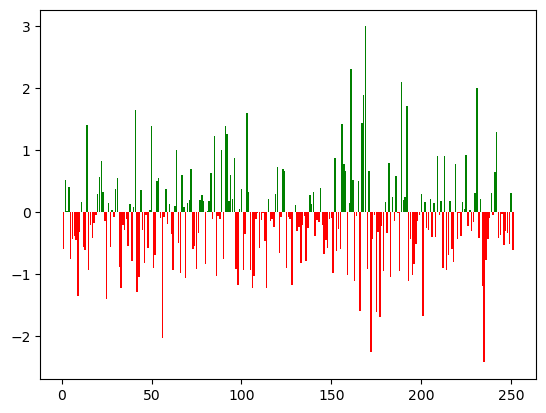

In [31]:
spy_positive = spyStockT[spyStockT['Percent_change']>0]
spy_negative = spyStockT[spyStockT['Percent_change']<0]


fig, ax = plt.subplots() 
ax.bar(spy_positive.index, spy_positive['Percent_change'], color="g")

ax.bar(spy_negative.index, spy_negative['Percent_change'], color="r")
plt.show()


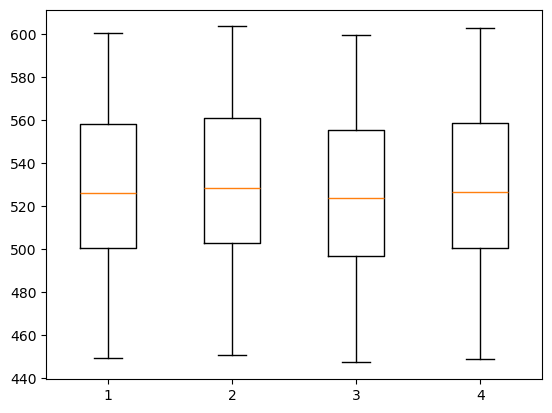

In [33]:
fig, ax = plt.subplots()

ax.boxplot([ spyStockT[c]for c in ["Open", "High", "Low", "Close"] ])

plt.show()

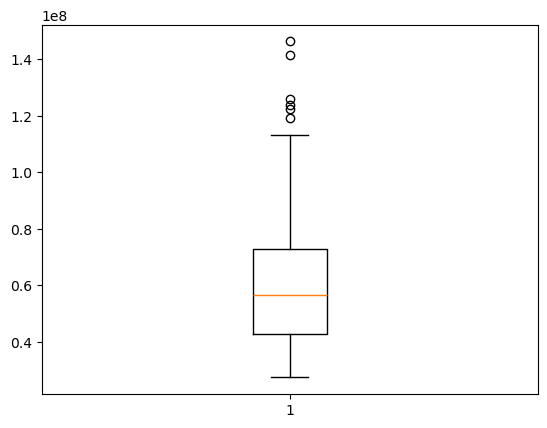

In [35]:
fig, ax = plt.subplots()

ax.boxplot([ spyStockT[c]for c in ["Volume"] ])

plt.show()

In [37]:
Q1 = spyStockT.Volume.quantile(0.25)
Q3 = spyStockT.Volume.quantile(0.75)
IQR = Q3 - Q1 

upperBound = Q3 + 1.5 * IQR 
lowerBound = Q1 - 1.5 * IQR

spyStockWithoutVolOutliers = spyStockT[ (spyStockT["Volume"] > upperBound)]

spyStockWithoutVolOutliers

,Date,Open,High,Low,Close,Volume,Percent_change
10,2023-12-14,466.195855,467.409455,462.989217,465.712402,119026000,-0.319905
11,2023-12-15,465.104096,466.302814,463.063343,464.945587,141319300,0.164926
20,2023-12-29,472.038720,472.573684,468.878518,470.869751,122234100,0.290334
21,2024-01-02,467.749145,469.245049,466.094733,468.234558,123623700,0.562793
41,2024-01-31,484.055387,484.511081,478.349186,478.369019,126011100,1.658799
169,2024-08-05,510.075475,521.978966,508.709638,515.797913,146267400,2.999728


## 3. **Retrieving data and saving them locally** 

    
We will use the `yfinance` library to download options data for the ticker symbol **SPY**. We start by fetching the data for option calls for **SPY** for all expiration dates.


In [40]:

# Expiration dates
expirations = ticker.options

# Create an empty list to store all option calls data
options_calls_list = []
# Create an empty list to store all option pus data
#options_calls_puts = []


# Loop through each expiration date to fetch options data
for exp in expirations:
    options = ticker.option_chain(exp)
    calls = options.calls
    #puts = options.puts 
    
    # Add expiration date to each DataFrame of calls and puts
    calls['expirationDateCalls'] = exp
    #puts['expirationDate_puts'] = exp

    # Append to the all_options DataFrame
    options_calls_list.append(calls)
    #options_puts_list.append(puts)


# Concatenate all DataFrames in the list
all_options_calls = pd.concat(options_calls_list, ignore_index=True)

# Save the options data to a CSV file
all_options_calls.to_csv('spy_options_calls_data.csv', index=False)


## 4. **Understanding the Data**


To have a DataFrame of fixed data, we create the CSV file on the Disk 'spy_options_calls_data_Nov23.csv'. This file is no longer affected by real-time data, and for the rest of this project, we work with this file.  

In [42]:
spy_options_calls = pd.read_csv('spy_options_calls_data_Nov23.csv')


spy_options_calls.info()
spy_options_calls.describe()
spy_options_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3705 entries, 0 to 3704
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   contractSymbol       3705 non-null   object 
 1   lastTradeDate        3705 non-null   object 
 2   strike               3705 non-null   float64
 3   lastPrice            3705 non-null   float64
 4   bid                  3702 non-null   float64
 5   ask                  3705 non-null   float64
 6   change               3705 non-null   float64
 7   percentChange        3705 non-null   float64
 8   volume               3577 non-null   float64
 9   openInterest         3701 non-null   float64
 10  impliedVolatility    3705 non-null   float64
 11  inTheMoney           3705 non-null   bool   
 12  contractSize         3705 non-null   object 
 13  currency             3705 non-null   object 
 14  expirationDateCalls  3705 non-null   object 
dtypes: bool(1), float64(9), object(5)
memo

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,expirationDateCalls
0,SPY241125C00300000,2024-11-21 20:32:18+00:00,300.0,295.04,295.00,296.22,0.000000,0.000000,1.0,240.0,2.765628,True,REGULAR,USD,2024-11-25
1,SPY241125C00535000,2024-11-20 20:33:29+00:00,535.0,55.00,60.06,61.26,0.000000,0.000000,1.0,1.0,0.544926,True,REGULAR,USD,2024-11-25
2,SPY241125C00540000,2024-11-21 20:22:54+00:00,540.0,55.04,55.04,56.26,-0.379997,-0.685668,5.0,2.0,0.664554,True,REGULAR,USD,2024-11-25
3,SPY241125C00550000,2024-11-22 18:16:33+00:00,550.0,46.20,45.06,46.27,9.780003,26.853386,2.0,1.0,0.564457,True,REGULAR,USD,2024-11-25
4,SPY241125C00560000,2024-11-22 19:39:03+00:00,560.0,34.84,35.07,36.27,5.889999,20.345420,1.0,5.0,0.461675,True,REGULAR,USD,2024-11-25


In [45]:
spy_options_calls['lastTradeDate'] = pd.to_datetime(spy_options_calls['lastTradeDate'])
spy_options_calls['lastTradeDate'] = spy_options_calls['lastTradeDate'].dt.strftime('%y:%m:%d %H:%M:%S')
spy_options_calls.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,expirationDateCalls
0,SPY241125C00300000,24:11:21 20:32:18,300.0,295.04,295.00,296.22,0.000000,0.000000,1.0,240.0,2.765628,True,REGULAR,USD,2024-11-25
1,SPY241125C00535000,24:11:20 20:33:29,535.0,55.00,60.06,61.26,0.000000,0.000000,1.0,1.0,0.544926,True,REGULAR,USD,2024-11-25
2,SPY241125C00540000,24:11:21 20:22:54,540.0,55.04,55.04,56.26,-0.379997,-0.685668,5.0,2.0,0.664554,True,REGULAR,USD,2024-11-25
3,SPY241125C00550000,24:11:22 18:16:33,550.0,46.20,45.06,46.27,9.780003,26.853386,2.0,1.0,0.564457,True,REGULAR,USD,2024-11-25
4,SPY241125C00560000,24:11:22 19:39:03,560.0,34.84,35.07,36.27,5.889999,20.345420,1.0,5.0,0.461675,True,REGULAR,USD,2024-11-25


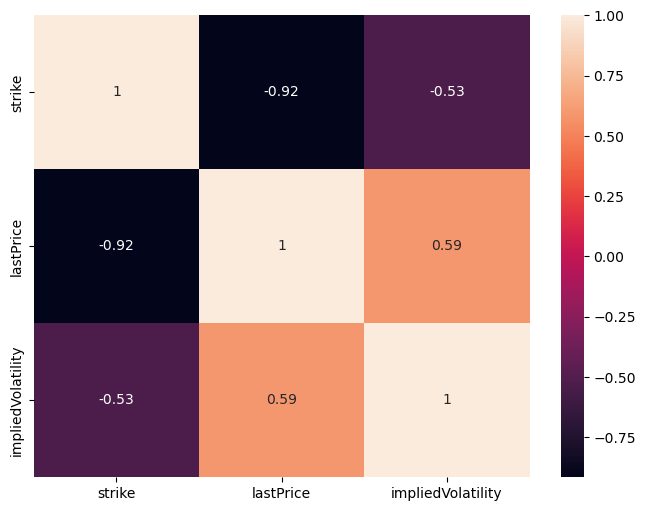

In [142]:


# Create a heatmap
corr_matrix = spy_options_calls[['strike',	'lastPrice', 'impliedVolatility']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [47]:
spy_options_calls = spy_options_calls.drop('contractSymbol', axis=1)
spy_options_calls.head()

,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,expirationDateCalls
0,24:11:21 20:32:18,300.0,295.04,295.00,296.22,0.000000,0.000000,1.0,240.0,2.765628,True,REGULAR,USD,2024-11-25
1,24:11:20 20:33:29,535.0,55.00,60.06,61.26,0.000000,0.000000,1.0,1.0,0.544926,True,REGULAR,USD,2024-11-25
2,24:11:21 20:22:54,540.0,55.04,55.04,56.26,-0.379997,-0.685668,5.0,2.0,0.664554,True,REGULAR,USD,2024-11-25
3,24:11:22 18:16:33,550.0,46.20,45.06,46.27,9.780003,26.853386,2.0,1.0,0.564457,True,REGULAR,USD,2024-11-25
4,24:11:22 19:39:03,560.0,34.84,35.07,36.27,5.889999,20.345420,1.0,5.0,0.461675,True,REGULAR,USD,2024-11-25


In [123]:
spy_options_calls.expirationDateCalls = pd.to_datetime(spy_options_calls.expirationDateCalls)
spy_options_calls.expirationDateCalls = spy_options_calls.expirationDateCalls.dt.strftime('%y-%m-%d')
spy_options_calls.expirationDateCalls.unique()

/var/folders/ns/ldg2lqpn3gv6lxm55vph6x540000gn/T/ipykernel_6717/4010395876.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  spy_options_calls.expirationDateCalls = pd.to_datetime(spy_options_calls.expirationDateCalls)


array(['25-11-24', '26-11-24', '27-11-24', '29-11-24', '12-02-24',
       '12-03-24', '12-06-24', '13-12-24', '20-12-24', '27-12-24',
       '31-12-24', '17-01-25', '31-01-25', '21-02-25', '28-02-25',
       '21-03-25', '31-03-25', '17-04-25', '30-04-25', '20-06-25',
       '30-06-25', '15-08-25', '19-09-25', '30-09-25', '19-12-25',
       '16-01-26', '18-06-26', '18-12-26', '15-01-27'], dtype=object)

In [125]:
Option_by_exp = {}
for date in spy_options_calls.expirationDateCalls.unique(): 
    Option_by_exp[date] = pd.DataFrame(spy_options_calls[spy_options_calls["expirationDateCalls"]==date])

df1125 = Option_by_exp['24-11-25']
df1203 =  Option_by_exp['24-03-12']
df1125.sort_values(by = "lastTradeDate").head()

KeyError: '24-11-25'

In [127]:
def my_plot(df, ax, column_title):
    df1 = df.sort_values(by = 'lastTradeDate')
    df1['Percent_change'] = 100*(df1[column_title].shift(1)-df1[column_title])/df1[column_title]
    df1_positive = df1[df1['Percent_change']>0]
    df1_negative = df1[df1['Percent_change']<0]
    ax.bar(df1_positive.index, df1_positive['Percent_change'], color="g")
    ax.bar(df1_negative.index, df1_negative['Percent_change'], color="r")
    ax.set_xlabel(column_title)
    ax.set_title("Percent Change by Date")
    


In [130]:
df1125.describe()

,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility
count,62,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,61.000000,62.000000,62.000000
mean,2024-11-22 06:51:04.580645120,593.064516,12.405161,12.442258,12.722419,0.430000,-13.296745,9802.311475,1644.532258,0.219098
min,2024-11-14 16:34:57,300.000000,0.010000,0.000000,0.010000,-0.639999,-87.500000,1.000000,1.000000,0.056894
25%,2024-11-22 14:44:45,583.250000,0.010000,0.000000,0.010000,-0.035000,-26.834374,10.000000,234.000000,0.088419
50%,2024-11-22 20:41:04.500000,598.500000,0.280000,0.280000,0.295000,0.000000,0.000000,123.000000,1161.000000,0.140756
75%,2024-11-22 21:13:09.750000128,613.750000,12.517500,12.365000,12.522500,0.347500,4.709017,2766.000000,2543.500000,0.215828
max,2024-11-22 21:14:59,645.000000,295.040000,295.000000,296.220000,9.780003,26.853386,125401.000000,11640.000000,2.765628
std,NaN,43.957457,38.741691,38.815213,39.062978,1.540205,30.314683,25955.642395,2003.705107,0.353568


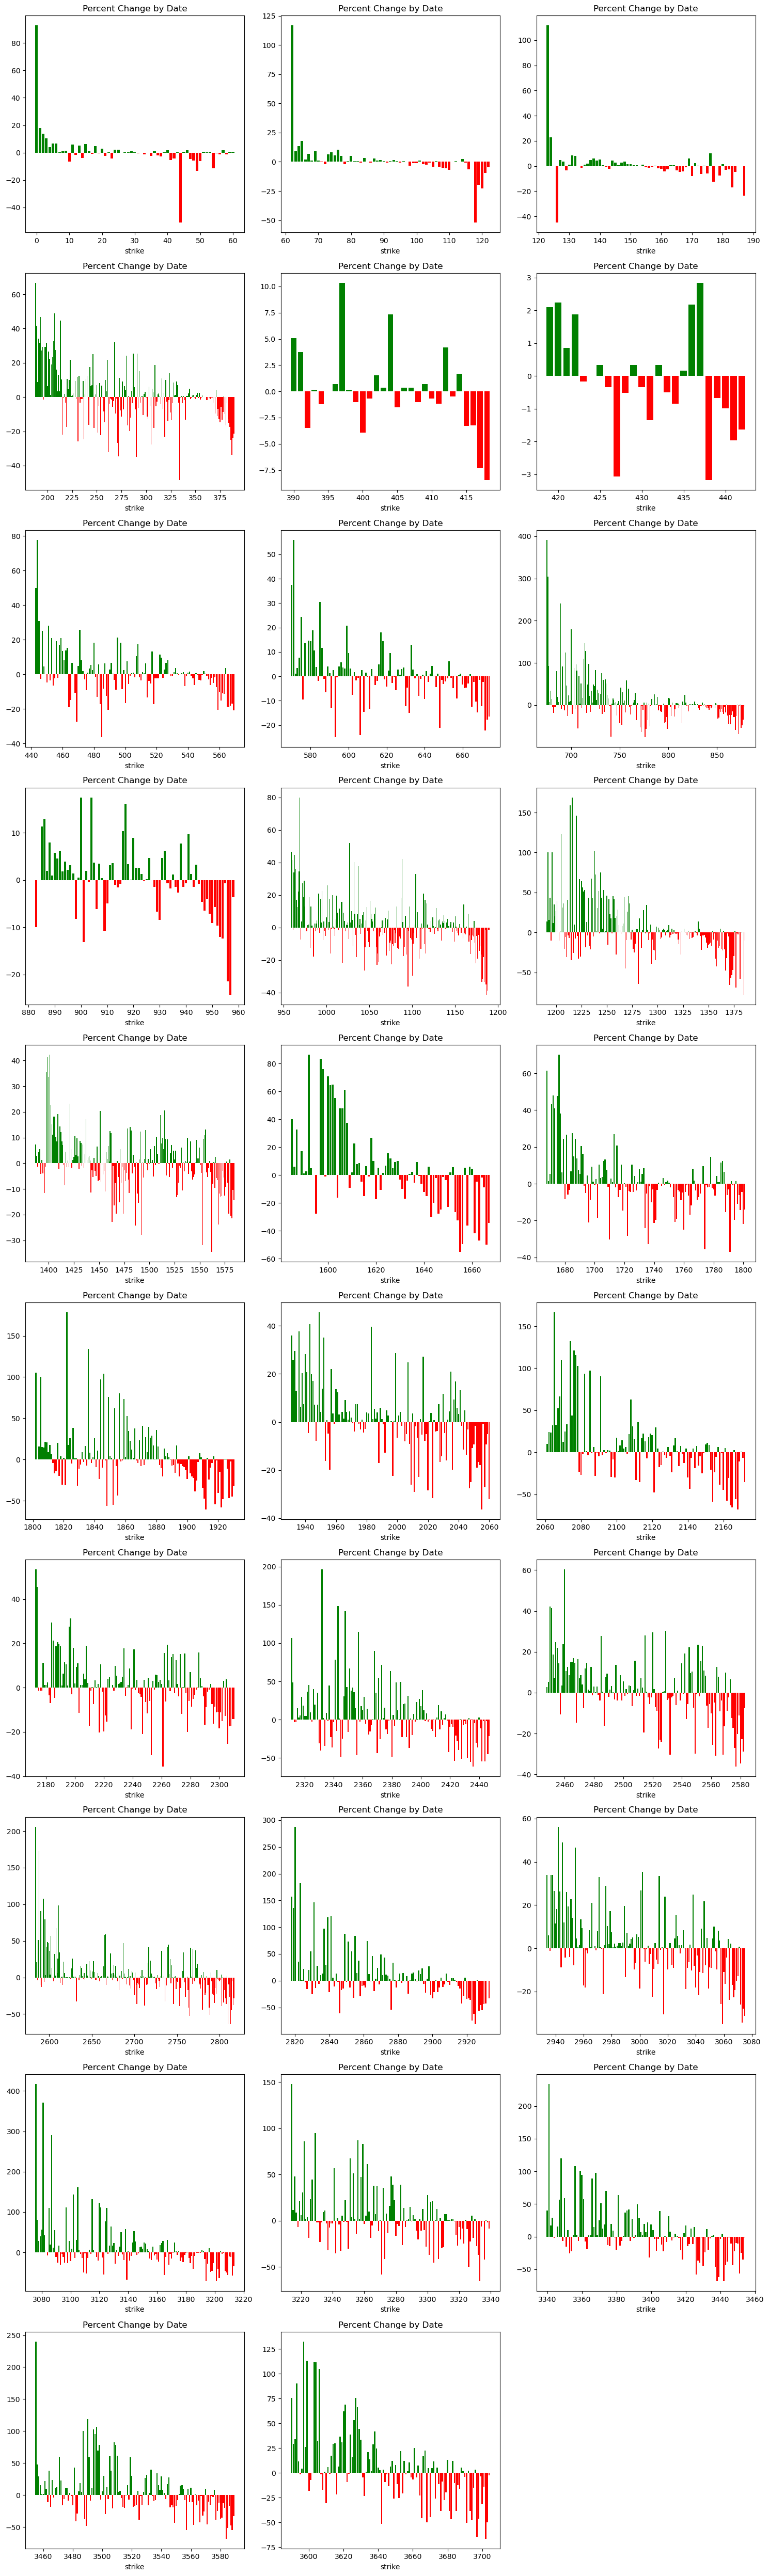

In [562]:
dfs = Option_by_exp
# Number of plots per row
plots_per_row = 3

# Calculate the number of rows needed
num_rows = (len(dfs) + plots_per_row - 1) // plots_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the DataFrames and plot them
for i, (key, df) in enumerate(dfs.items()):
     my_plot(df, axes[i], 'strike')

# Hide any unused subplots
for j in range(len(dfs), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


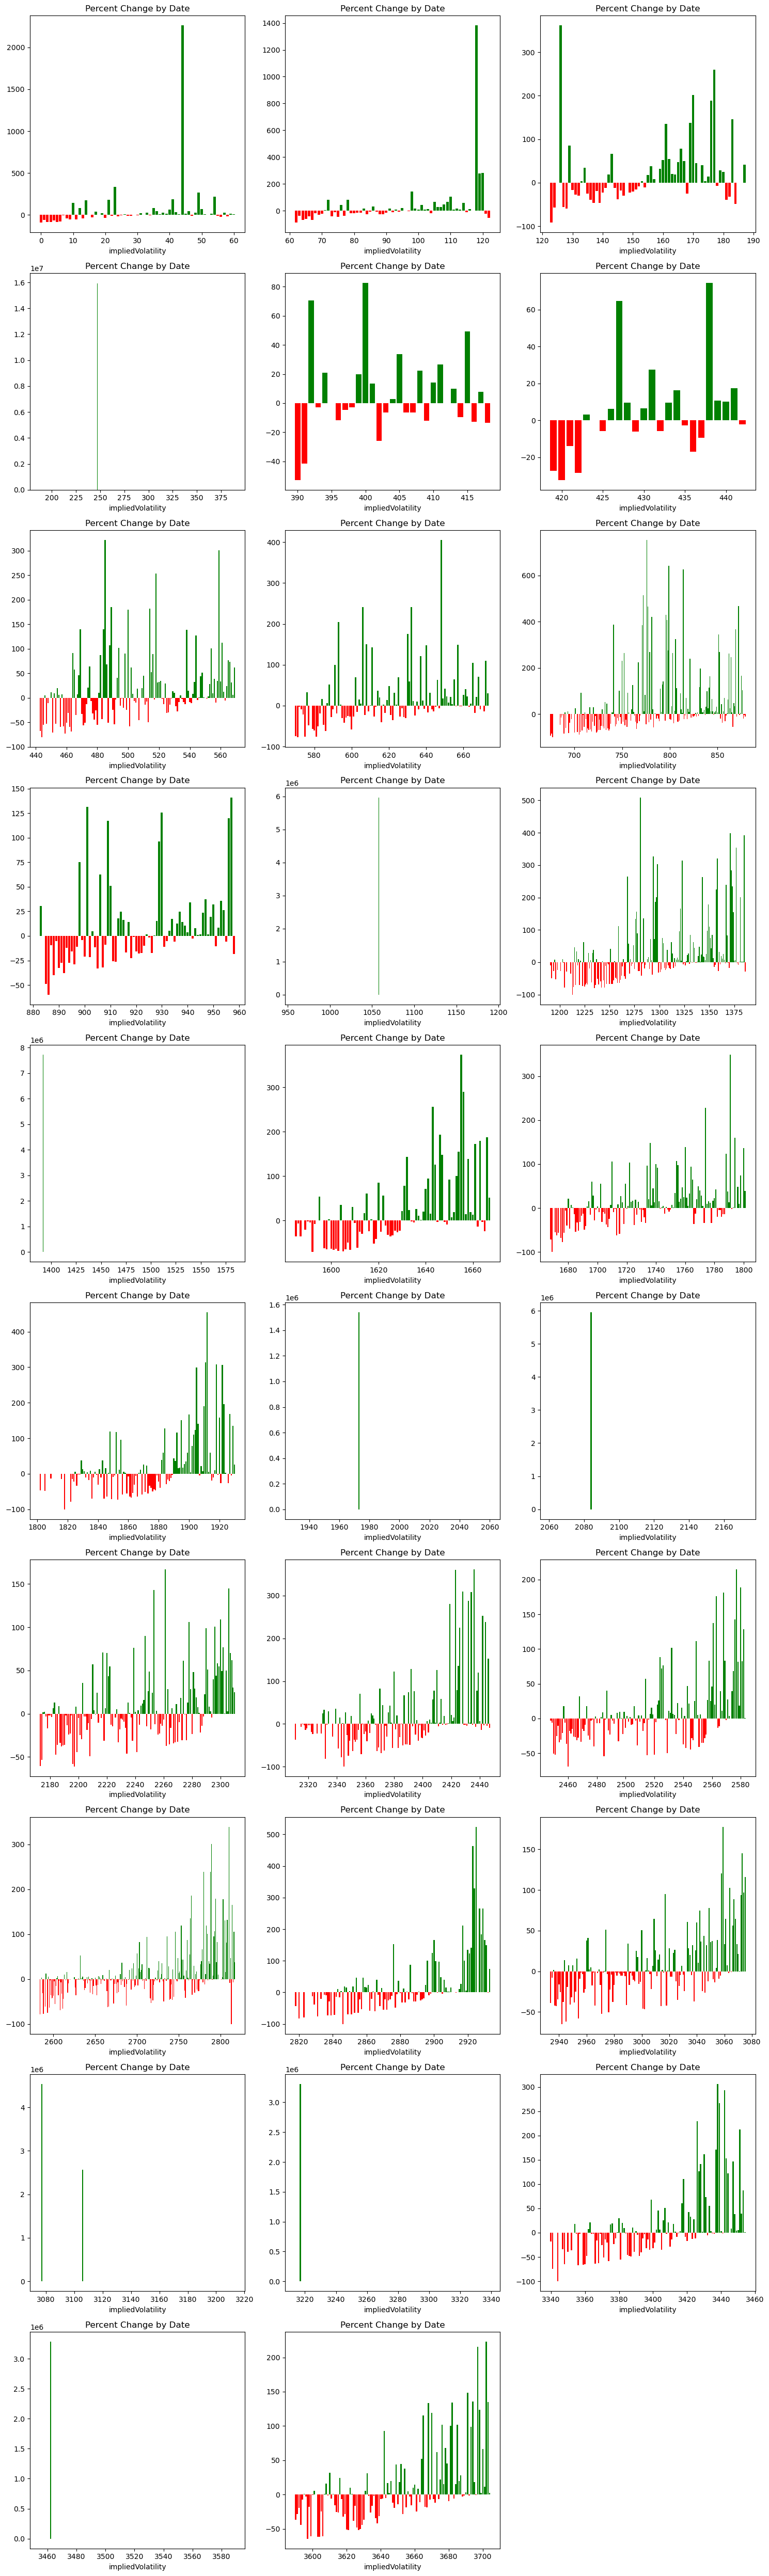

In [563]:
dfs = Option_by_exp
# Number of plots per row
plots_per_row = 3

# Calculate the number of rows needed
num_rows = (len(dfs) + plots_per_row - 1) // plots_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the DataFrames and plot them
for i, (key, df) in enumerate(dfs.items()):
     my_plot(df, axes[i], 'impliedVolatility')
     

# Hide any unused subplots
for j in range(len(dfs), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

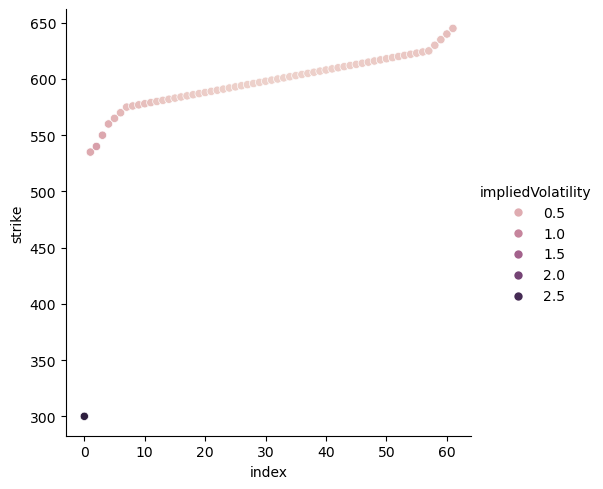

In [374]:
sns.relplot(data=df1125, x="index", y="strike",hue="impliedVolatility")
sns.relplot(data=Option_by_exp['24-12-03'], x="index", y="strike",hue="impliedVolatility")
plt.show() 


By defual `contractSymbol` is the index of this DataFrame. We also check if the column `contractSymbol` is unique for each row of data. Consider that we have 3705 entries. We can see in the following code the number of unique entries in the `contractSymbol` column is equal to 3705, so we use it as index. 

In [256]:
# Set `contractSymbol` as the index 

print(spy_options_calls.index)
len(spy_options_calls['contractSymbol'].unique())

RangeIndex(start=0, stop=3705, step=1)


3705

In [ ]:
spy_options_calls['contractSymbol'].unique()

When fetching options data for **SPY** (or any stock/index) using `yfinance`, the returned table typically includes several columns that provide detailed information about the option contracts. Here's an explanation of each of them:

### 4.1. **contractSymbol**
   - **Description**: A unique identifier for the specific option contract. It usually includes information about the underlying asset (e.g., SPY), the expiration date, strike price, and whether it is a call or put option.
   - **Example**: `SPY230120C00400000` (SPY option expiring on Jan 20, 2023, with a strike price of 400).

### 4.2. **lastTradeDate**
   - **Description**: The date and time of the most recent trade of the option contract. It helps you understand when the last transaction occurred.
   - **Example**: `2023-01-19 15:59:50` (indicating that the last trade took place on January 19, 2023, at 3:59 PM).

### 4.3. **strike**
   - **Description**: The strike price of the option, which is the price at which the option holder can buy (call) or sell (put) the underlying asset (e.g., SPY).
   - **Example**: `400` (indicating that the strike price of the option is $400).

### 4.4. **lastPrice**
   - **Description**: The most recent price at which the option was traded.
   - **Example**: `3.50` (indicating that the most recent trade price of the option was $3.50).

### 4.5. **bid**
   - **Description**: The current highest price a buyer is willing to pay for the option contract.
   - **Example**: `3.30` (indicating that the highest bid price is $3.30).

### 4.6. **ask**
   - **Description**: The current lowest price a seller is asking for the option contract.
   - **Example**: `3.60` (indicating that the lowest ask price is $3.60).

### 4.7. **change**
   - **Description**: The change in the price of the option compared to its previous closing price.
   - **Example**: `-0.10` (indicating that the option price has decreased by $0.10 from the previous close).

### 4.8. **percentChange**
   - **Description**: The percentage change in the price of the option compared to its previous closing price.
   - **Example**: `-2.7%` (indicating that the option price has decreased by 2.7% from the previous close).

### 4.9. **volume**
   - **Description**: The number of contracts that have been traded during the current trading day. This helps assess the liquidity of the option.
   - **Example**: `500` (indicating that 500 contracts have been traded during the current trading session).

### 4.10. **openInterest**
   - **Description**: The total number of outstanding contracts (both calls and puts) that have not been closed or exercised. It provides an indication of how active or popular the option contract is.
   - **Example**: `1200` (indicating that there are 1200 contracts still open for this option).

### 4.11. **impliedVolatility**
   - **Description**: The implied volatility is a measure of the market's forecast of the underlying asset’s volatility. It is calculated from the option's price and is an estimate of future volatility.
   - **Example**: `0.15` or `15%` (indicating that the implied volatility for the option is 15%).

### 4.12. **inTheMoney**
   - **Description**: Indicates whether the option is "in the money" (ITM) or not. 
     - A **call option** is in the money if the strike price is lower than the current price of the underlying asset.
     - A **put option** is in the money if the strike price is higher than the current price of the underlying asset.
   - **Example**: `True` (indicating that the option is in the money) or `False` (indicating that the option is out of the money).

### 4.13. **contractSize**
   - **Description**: The number of units of the underlying asset that the option contract represents. For standard U.S. options, this is typically 100 shares.
   - **Example**: `100` (indicating that one contract represents 100 shares of SPY).

### 4.14. **currency**
   - **Description**: The currency in which the option price is quoted. This can be important if you're dealing with options in different markets.
   - **Example**: `USD` (indicating that the option price is quoted in U.S. dollars).

### 4.15. **expirationDate**
   - **Description**: The date when the option expires. After this date, the option is no longer valid and cannot be exercised.
   - **Example**: `2023-01-20` (indicating that the option expires on January 20, 2023).

### 16. **expirationDateCalls**
   - **Description**: This column is specifically for call options and typically shows the expiration date of the options, similar to the `expirationDate` column but focused on calls.
   - **Example**: `2023-01-20` (indicating that the expiration date for call options is January 20, 2023).

Each of these columns provides important details about the option contract for SPY, allowing traders and analysts to assess liquidity, pricing, and the relative attractiveness of the contract.

## 5. **Handling Missing Data

### 5.1 Identifying Missing Values

In [258]:
spy_options_calls.isnull().sum()

contractSymbol           0
lastTradeDate            0
strike                   0
lastPrice                0
bid                      3
ask                      0
change                   0
percentChange            0
volume                 128
openInterest             4
impliedVolatility        0
inTheMoney               0
contractSize             0
currency                 0
expirationDateCalls      0
dtype: int64

### 5.2 Handling Missing Values (remove or impute missing values)

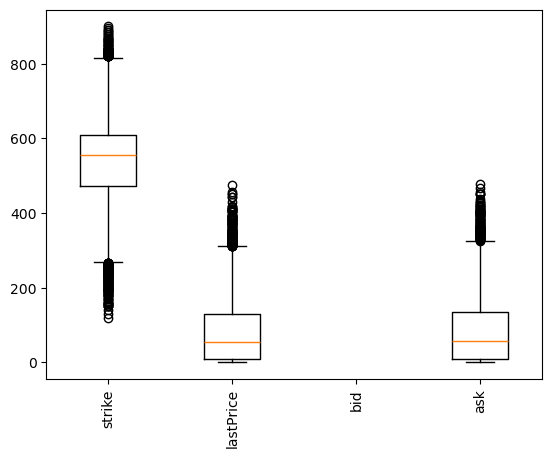

In [270]:
fig, ax = plt.subplots()

numeric_df = spy_options_calls.select_dtypes(include=['number'])
ax.boxplot( [numeric_df[c] for c  in ['strike', 'lastPrice', 'bid', 'ask']])
ax.set_xticklabels([c for c  in ['strike', 'lastPrice', 'bid', 'ask']], rotation = 90)


plt.show()




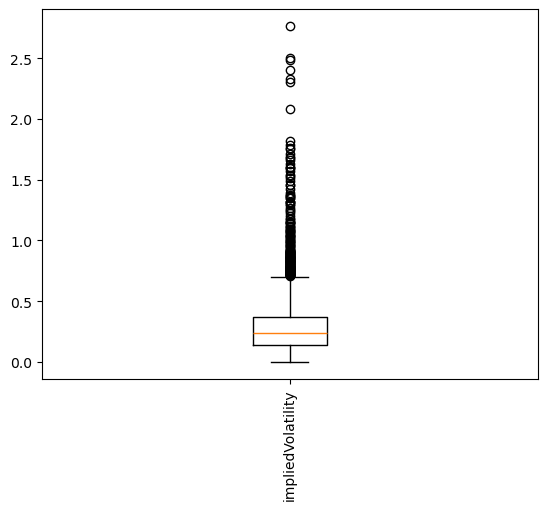

In [273]:
fig, ax = plt.subplots()

numeric_df = spy_options_calls.select_dtypes(include=['number'])
ax.boxplot( [numeric_df[c] for c  in ['impliedVolatility']])
ax.set_xticklabels([c for c  in ['impliedVolatility']], rotation = 90)


plt.show()

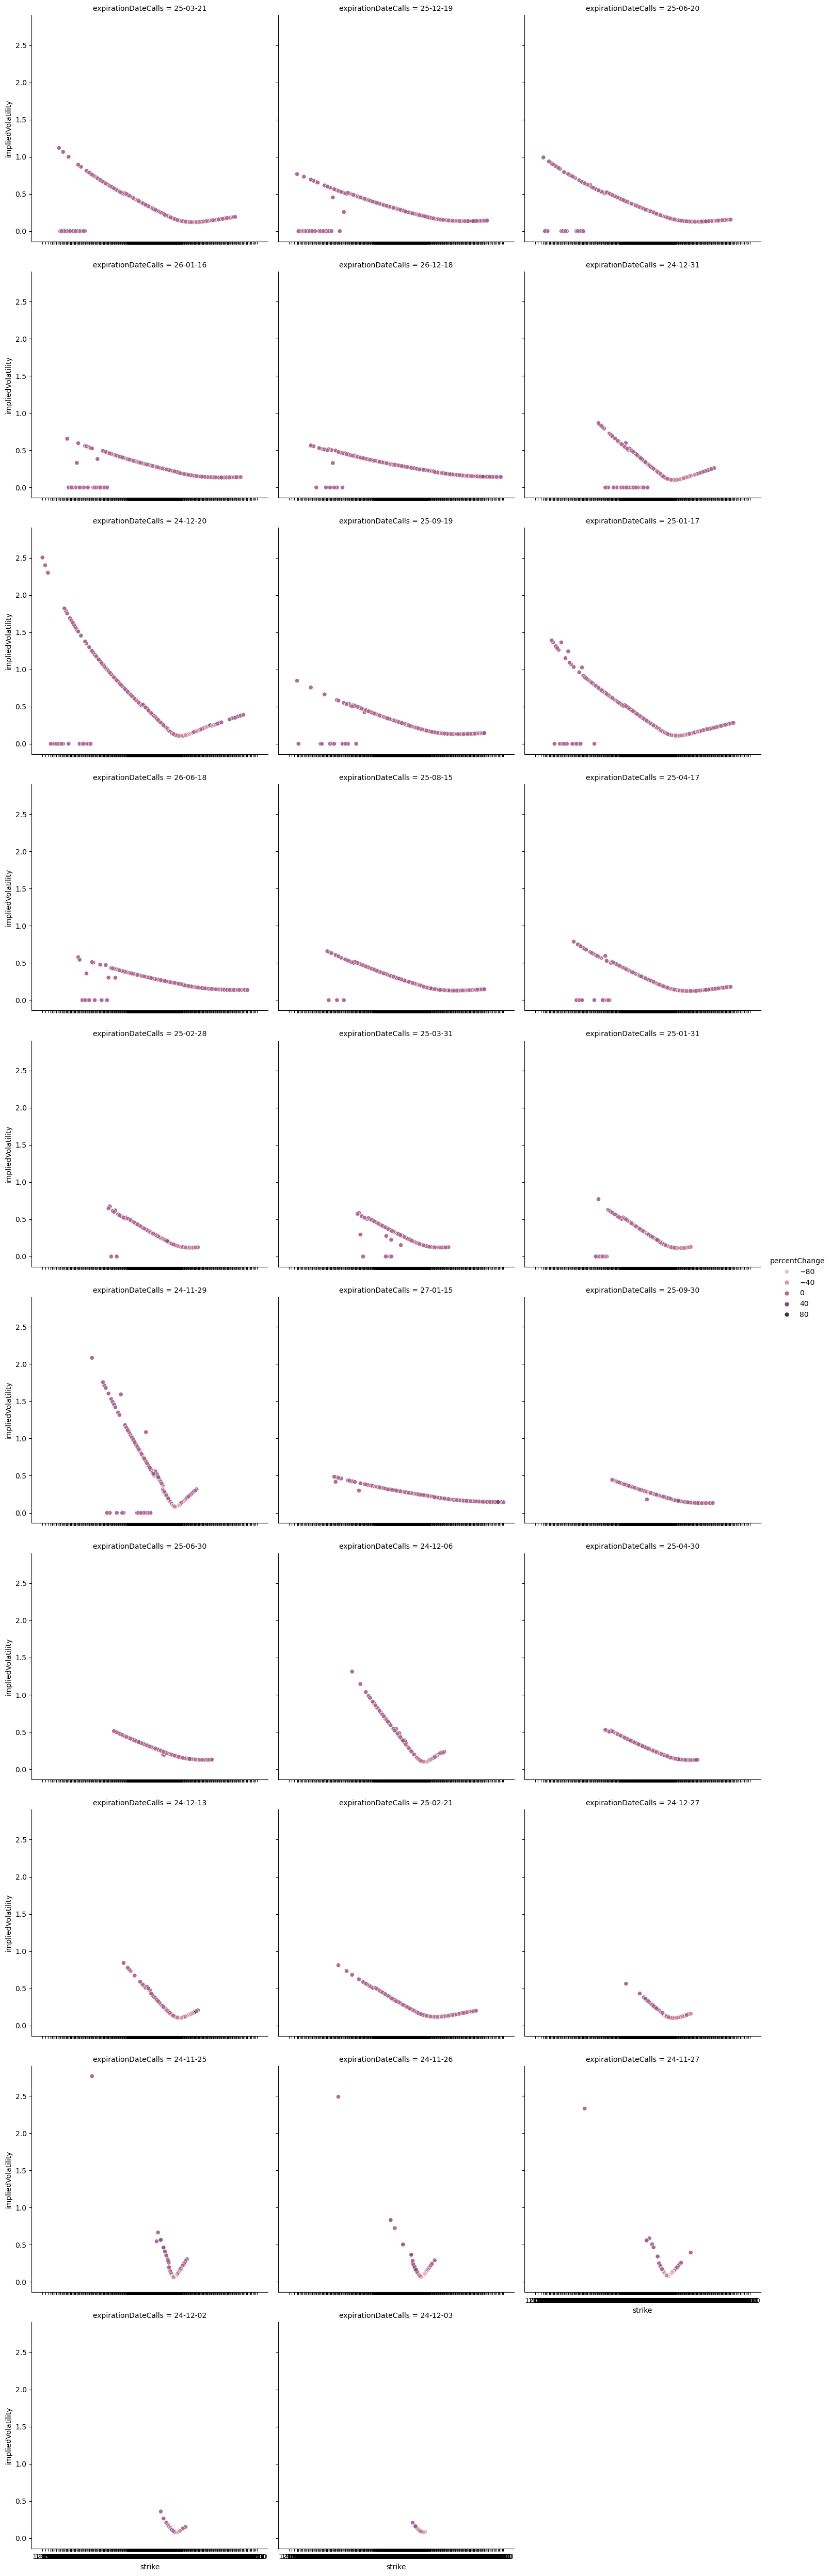

In [522]:
import seaborn as sns

g= sns.relplot(data=spy_options_calls.sort_values(by = "lastTradeDate"), x="strike", y="impliedVolatility",col="expirationDateCalls", col_wrap = 3,hue="percentChange")
# Iterate over each axis to set the tick labels
for ax in g.axes.flat:
    ax.set_xticks(spy_options_calls['strike'])  # Set the position of ticks
    #ax.set_xticklabels(new_labels)  # Set the labels

plt.show()

We examined each column to determine the number of missing data entries. We see that for the `volume`, we have a considerable number of missing values. So, to decide if we need to remove the missing values or impute them, we check the distribution of missing data in `volume` with respect to the expiration dates `expirationDateCalls`. 

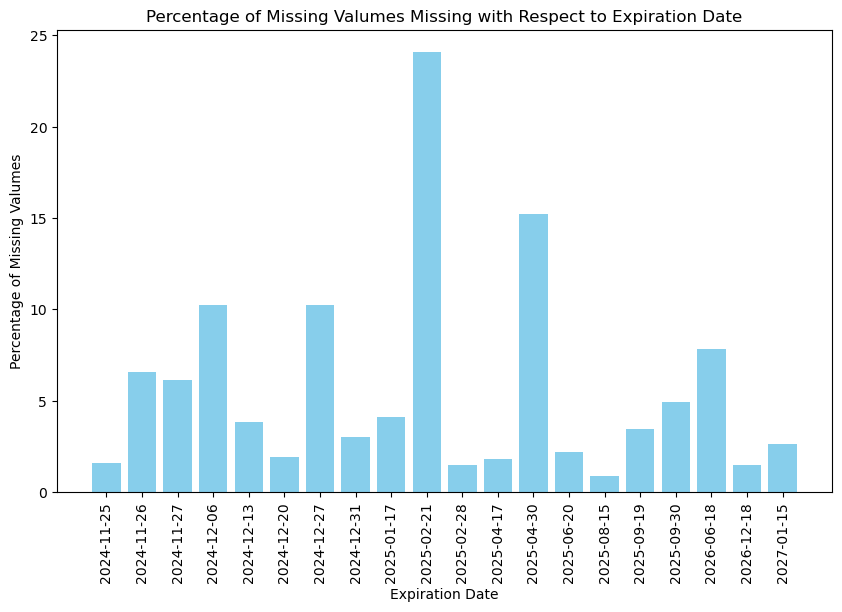

In [278]:
missing_values_by_exp = spy_options_calls[spy_options_calls['volume'].isnull()].groupby('expirationDateCalls').size()
missing_values_by_exp = missing_values_by_exp.reset_index()
missing_values_by_exp.columns = ['expirationDateCalls', 'missingVolume']

#Creating ex_spy DataFrame holding the number of rows in spy_options_calls  with the same expiration date
ex_spy = spy_options_calls.groupby('expirationDateCalls').size().reset_index()
ex_spy.columns = ['expirationDateCalls', 'total_counts']

# Merge the missing counts with total counts
merged_counts = pd.merge(missing_values_by_exp, ex_spy, on='expirationDateCalls')



plt.figure(figsize=(10, 6))
plt.bar(merged_counts['expirationDateCalls'], merged_counts['missingVolume']/merged_counts['total_counts'] * 100, color='skyblue')
plt.xlabel('Expiration Date')
plt.ylabel('Percentage of Missing Valumes')
plt.xticks(rotation=90)
plt.title('Percentage of Missing Valumes Missing with Respect to Expiration Date')
plt.show()



Since most columns have a small number of missing values, we will completely remove the volume column and drop the other rows containing missing values.

In [280]:
spy_options_calls.drop('volume', axis=1, errors='ignore', inplace = True)

spy_options_calls = spy_options_calls[~spy_options_calls['bid'].isnull()]
spy_options_calls = spy_options_calls[~spy_options_calls['openInterest'].isnull()]

spy_options_calls.isnull().sum()

contractSymbol         0
lastTradeDate          0
strike                 0
lastPrice              0
bid                    0
ask                    0
change                 0
percentChange          0
openInterest           0
impliedVolatility      0
inTheMoney             0
contractSize           0
currency               0
expirationDateCalls    0
dtype: int64

## 6. Data Transformation

In [282]:
spy_options_calls['lastTradeDate'] = pd.to_datetime(spy_options_calls['lastTradeDate'])
spy_options_calls['expirationDateCalls'] = pd.to_datetime(spy_options_calls['expirationDateCalls'])

## 7. Handling outliers 

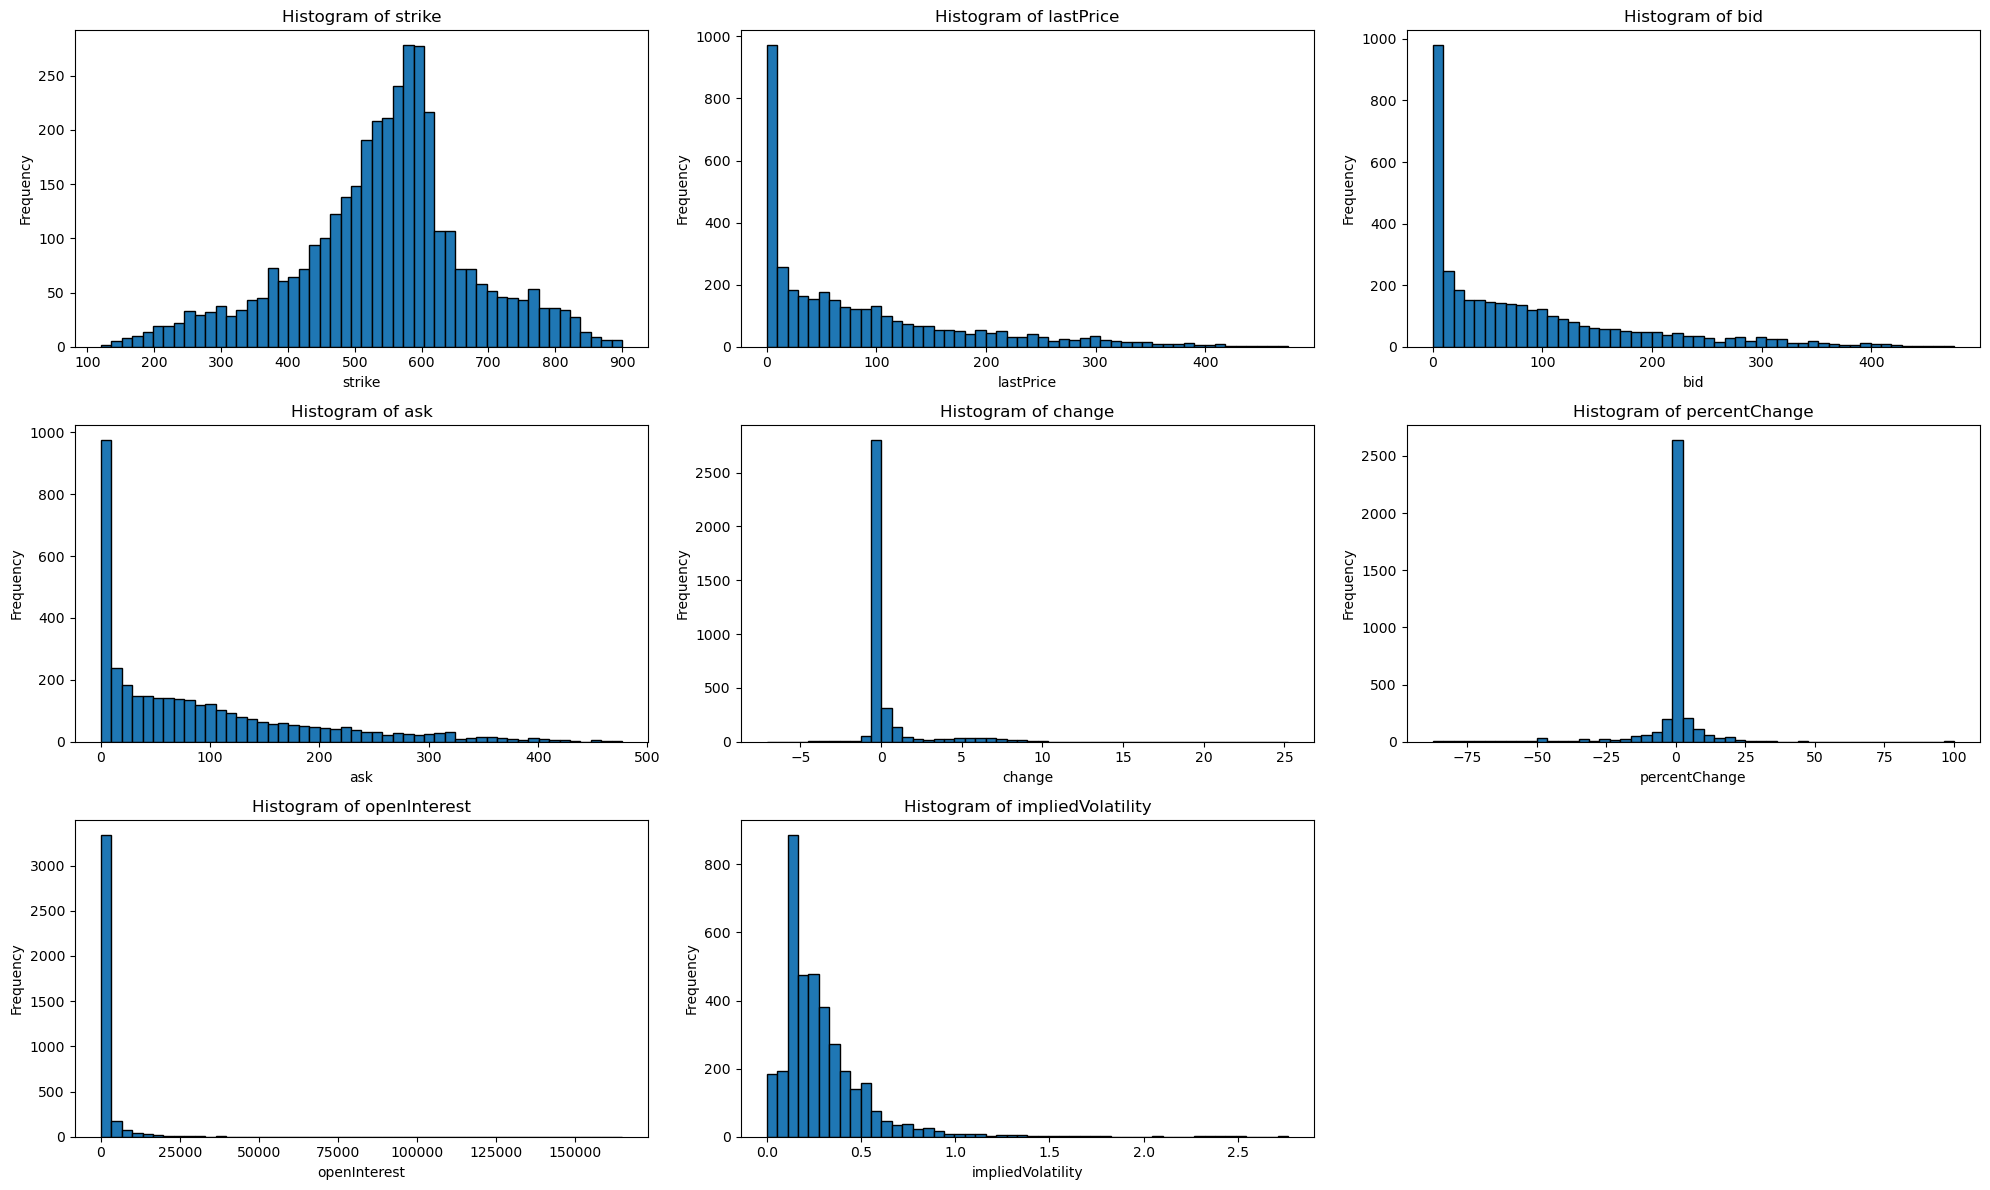

In [284]:
df = spy_options_calls

# Select only the numerical columns
numerical_columns = df.select_dtypes(include='number')

# Create a grid of subplots: rows and columns based on the number of numerical columns
num_cols = len(numerical_columns.columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # Adjust rows for grid
fig, axes = plt.subplots(rows, 3, figsize=(20, 4 * rows))

# Flatten axes to make iteration easier (in case there are multiple rows)
axes = axes.flatten()

# Plot histograms for each numerical column
for i, column in enumerate(numerical_columns.columns):
    axes[i].hist(df[column], bins=50, edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots (if there are more grid cells than columns)
for i in range(num_cols, len(axes)):
    axes[i].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


From the plots it is clear that the only ones with useful information are `impliedVolatility` and `strike`. For example, as you see below more than 30 percent of the entries in `percentChange` are zero. 

In [286]:
spy_options_calls[spy_options_calls['percentChange']== 0].shape

(2162, 14)

Now we check the columns `inTheMoney`, `contractSize`, `currency`.

In [57]:
print(spy_options_calls['contractSize'].unique())
print(spy_options_calls['currency'].unique())
print(spy_options_calls['inTheMoney'].unique())

spy_options_calls[spy_options_calls['inTheMoney']== True].shape

['REGULAR']
['USD']
[ True False]


(2533, 14)

This shows that we only have one type of currency and contract size, so we drop this columns, as well. 

In [60]:
spy_options_calls_cleaned = spy_options_calls[['contractSymbol', 'lastTradeDate', 'strike', 'inTheMoney','impliedVolatility', 'expirationDateCalls']]


spy_options_calls_cleaned.info()
spy_options_calls_cleaned.describe()
spy_options_calls_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3698 entries, 0 to 3704
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   contractSymbol       3698 non-null   object             
 1   lastTradeDate        3698 non-null   datetime64[ns, UTC]
 2   strike               3698 non-null   float64            
 3   inTheMoney           3698 non-null   bool               
 4   impliedVolatility    3698 non-null   float64            
 5   expirationDateCalls  3698 non-null   datetime64[ns]     
dtypes: bool(1), datetime64[ns, UTC](1), datetime64[ns](1), float64(2), object(1)
memory usage: 177.0+ KB


,contractSymbol,lastTradeDate,strike,inTheMoney,impliedVolatility,expirationDateCalls
0,SPY241125C00300000,2024-11-21 20:32:18+00:00,300.0,True,2.765628,2024-11-25
1,SPY241125C00535000,2024-11-20 20:33:29+00:00,535.0,True,0.544926,2024-11-25
2,SPY241125C00540000,2024-11-21 20:22:54+00:00,540.0,True,0.664554,2024-11-25
3,SPY241125C00550000,2024-11-22 18:16:33+00:00,550.0,True,0.564457,2024-11-25
4,SPY241125C00560000,2024-11-22 19:39:03+00:00,560.0,True,0.461675,2024-11-25


In [7]:
import yfinance as yf

ticker_symbol_SH = 'SH'
# Initialize the yfinance Ticker object for SPY
ticker_SH = yf.Ticker(ticker_symbol_SH)

stock_history_SH = ticker_SH.history(period='1y')

stock_history_SH['Percent_change']=100*(stock_history_SH['Close'].shift(1)-stock_history_SH['Close'])/stock_history_SH['Close']


# Save the options data to a CSV file
stock_history_SH.to_csv('SH_stock.csv')


In [13]:
stock_SH = pd.read_csv("SH_stock_Dec12.csv")
stock_SH.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Percent_change
0,2023-12-13 00:00:00-05:00,51.628322,51.704693,50.940961,50.979149,4499700,0.0,0.0,0.0,NaN
1,2023-12-14 00:00:00-05:00,50.788213,51.170077,50.635467,50.826401,8045400,0.0,0.0,0.0,0.300529
2,2023-12-15 00:00:00-05:00,50.940958,51.055517,50.788212,50.902771,5621825,0.0,0.0,0.0,-0.150032
3,2023-12-18 00:00:00-05:00,50.788210,50.788210,50.559089,50.635464,2799075,0.0,0.0,0.0,0.527905
4,2023-12-19 00:00:00-05:00,50.635467,50.635467,50.368158,50.406345,4825175,0.0,0.0,0.0,0.454543


In [17]:

# Expiration dates
expirations_SH = ticker_SH.options

# Create an empty list to store all option calls data
options_calls_list_SH = []
# Create an empty list to store all option pus data
#options_calls_puts = []


# Loop through each expiration date to fetch options data
for exp in expirations_SH:
    options_SH = ticker_SH.option_chain(exp)
    calls_SH = options_SH.calls
    #puts = options.puts 
    
    # Add expiration date to each DataFrame of calls and puts
    calls_SH['expirationDateCalls'] = exp
    #puts['expirationDate_puts'] = exp

    # Append to the all_options DataFrame
    options_calls_list_SH.append(calls_SH)
    #options_puts_list.append(puts)


# Concatenate all DataFrames in the list
all_options_calls_SH = pd.concat(options_calls_list_SH, ignore_index=True)

# Save the options data to a CSV file
all_options_calls_SH.to_csv('spy_options_calls_data_SH.csv', index=False)

In [19]:
calls_SH = pd.read_csv('spy_options_calls_data_SH_Dec12.csv')
calls_SH.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,expirationDateCalls
0,SH241220C00009000,2024-11-06 14:30:01+00:00,9.0,1.80,0.0,0.0,0.0,0.0,1.0,2,0.00001,True,REGULAR,USD,2024-12-20
1,SH241220C00010000,2024-11-06 18:02:02+00:00,10.0,0.70,0.0,0.0,0.0,0.0,51.0,227,0.00001,True,REGULAR,USD,2024-12-20
2,SH241220C00011000,2024-11-04 14:30:07+00:00,11.0,0.11,0.0,0.0,0.0,0.0,58.0,0,0.00001,True,REGULAR,USD,2024-12-20
3,SH241220C00012000,2024-11-06 14:30:01+00:00,12.0,0.10,0.0,0.0,0.0,0.0,7.0,98,0.00001,True,REGULAR,USD,2024-12-20
4,SH241220C00013000,2024-11-06 14:30:01+00:00,13.0,0.05,0.0,0.0,0.0,0.0,20.0,21,0.00001,True,REGULAR,USD,2024-12-20
